In [2]:
import cv2 as cv
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt


plt.rcParams['figure.figsize'] = [25, 25]

In [4]:
root_dir = "skin-cancer-mnist-ham10000"
metadata = 'HAM10000_metadata.csv'
df = pd.read_csv("{}/{}".format(root_dir, metadata)).sample(frac=1)

df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
8654,HAM_0004897,ISIC_0026293,nv,histo,30.0,female,lower extremity
8668,HAM_0006398,ISIC_0027568,nv,histo,70.0,male,ear
521,HAM_0003943,ISIC_0031464,bkl,histo,80.0,female,lower extremity
7305,HAM_0005363,ISIC_0032717,nv,histo,60.0,male,trunk
2966,HAM_0006444,ISIC_0032318,bcc,histo,65.0,male,face


In [5]:
dx_dictionary = {
    "bcc": "basal cell carcinoma",
    "akiec":"Actinic keratoses and intraepithelial carcinoma / Bowen's disease",
    "bkl": "benign keratosis-like lesions",
    "df":"dermatofibroma",
    "mel":"melanoma",
    "nv":"melanocytic nevi",
    "vasc":"vascular lesions"
}

In [6]:
diagnoses = df.dx.unique()
dfs_dict = {}


for diagnosis in diagnoses:
    dfs_dict[diagnosis] = list(df[df['dx'] == diagnosis][:10].image_id)


<Figure size 576x576 with 0 Axes>

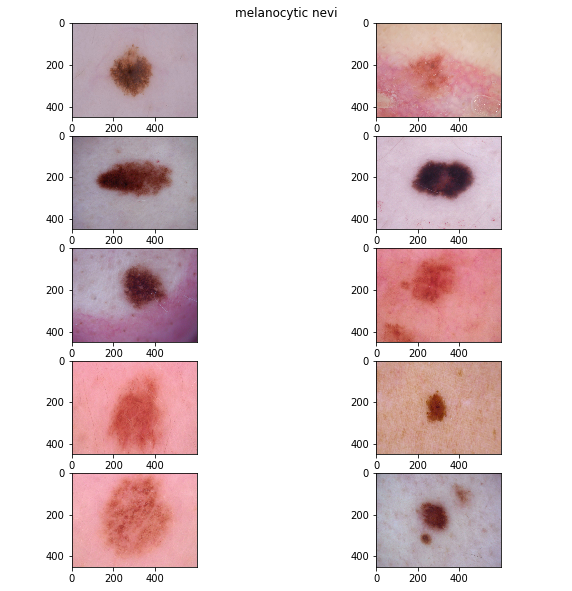

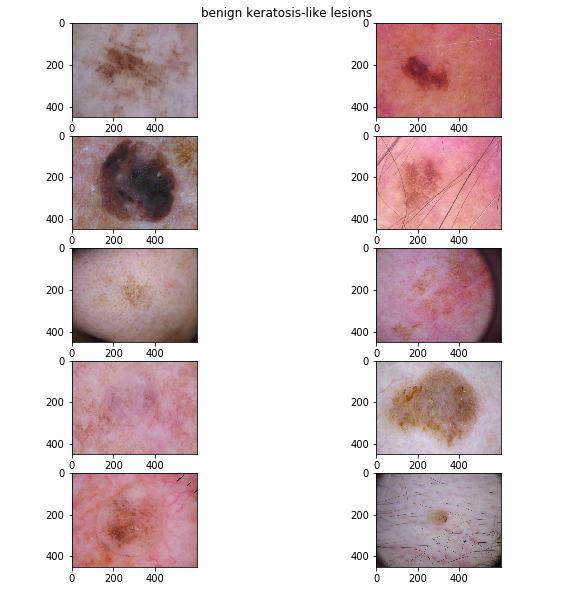

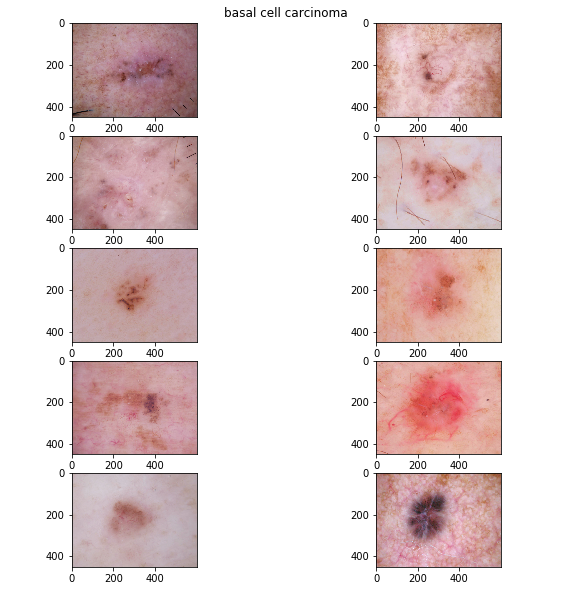

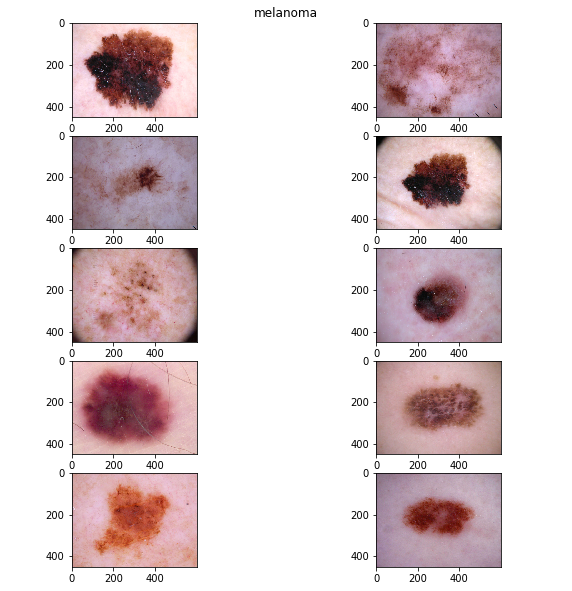

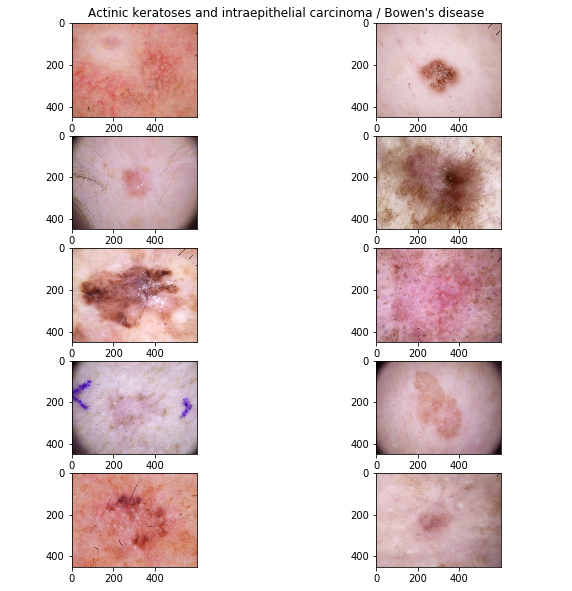

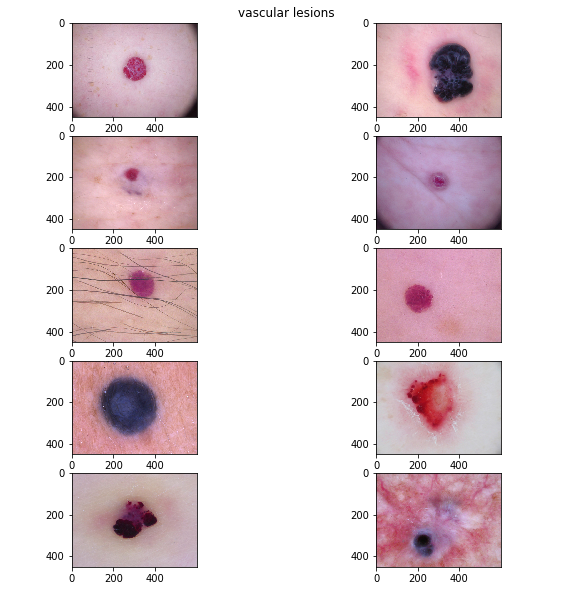

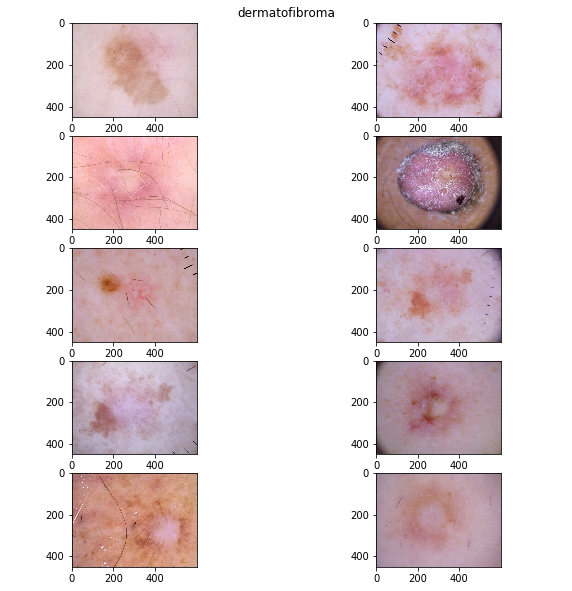

In [8]:
def get_file(filename):
    directories = os.listdir(root_dir)
    directory = None
    
    for i in directories:
        if "." not in i and "{}.jpg".format(filename) in os.listdir("{}/{}".format(root_dir, i)):
            directory = i 
    
    img = cv.cvtColor(cv.imread("{}/{}/{}.jpg".format(root_dir, directory, filename)), cv.COLOR_BGR2RGB)
    
    return img


fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 7
for  index, key in enumerate(dfs_dict):
    our_fig = plt.figure(figsize=(10, 10))
    plt.title(dx_dictionary[key])
    plt.axis('off')
    columns_ = 2
    rows_ = 5
    for j, img_name in enumerate(dfs_dict[key]):
        img = get_file(img_name)
        our_fig.add_subplot(rows_, columns_, j+1)
        plt.imshow(img)
plt.show()